In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from dateutil import parser

In [33]:
data = pd.read_csv("0.data/appdata10.csv")
data.head()

,user,first_open,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,liked
0,235136,2012-12-27 02:14:51.273,3,02:00:00,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,NaN,0
1,333588,2012-12-02 01:16:00.905,6,01:00:00,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,NaN,0
2,254414,2013-03-19 19:19:09.157,1,19:00:00,23,"Splash,Cycle,Loan",3,0,1,0,NaN,1
3,234192,2013-07-05 16:08:46.354,4,16:00:00,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,2013-07-05 16:11:49.513,0
4,51549,2013-02-26 18:50:48.661,1,18:00:00,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,2013-02-26 18:56:37.841,1


In [9]:
data.describe()

,user,dayofweek,hour,age,numscreens,minigame,used_premium_feature,enrolled,liked
count,50000.000000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,186889.729900,3.029860,12.557220,31.72436,21.095900,0.107820,0.172020,0.621480,0.165000
std,107768.520361,2.031997,7.438072,10.80331,15.728812,0.310156,0.377402,0.485023,0.371184
min,13.000000,0.000000,0.000000,16.00000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,93526.750000,1.000000,5.000000,24.00000,10.000000,0.000000,0.000000,0.000000,0.000000
50%,187193.500000,3.000000,14.000000,29.00000,18.000000,0.000000,0.000000,1.000000,0.000000
75%,279984.250000,5.000000,19.000000,37.00000,28.000000,0.000000,0.000000,1.000000,0.000000
max,373662.000000,6.000000,23.000000,101.00000,325.000000,1.000000,1.000000,1.000000,1.000000


## Data Cleaning

In [34]:
data['hour']

0         02:00:00
1         01:00:00
2         19:00:00
3         16:00:00
4         18:00:00
           ...    
49995     13:00:00
49996     00:00:00
49997     22:00:00
49998     12:00:00
49999     01:00:00
Name: hour, Length: 50000, dtype: object

In [35]:
data['hour'] = data['hour'].str.slice(1,3).astype(int)
data['hour']

0         2
1         1
2        19
3        16
4        18
         ..
49995    13
49996     0
49997    22
49998    12
49999     1
Name: hour, Length: 50000, dtype: int32

In [36]:
data2 = data.copy().drop(columns = ['user', 'screen_list', 'first_open', 'enrolled'])
data2.head()

,dayofweek,hour,age,numscreens,minigame,used_premium_feature,enrolled_date,liked
0,3,2,23,15,0,0,NaN,0
1,6,1,24,13,0,0,NaN,0
2,1,19,23,3,0,1,NaN,1
3,4,16,28,40,0,0,2013-07-05 16:11:49.513,0
4,1,18,31,32,0,0,2013-02-26 18:56:37.841,1


## Histogram

TypeError: '<=' not supported between instances of 'float' and 'str'

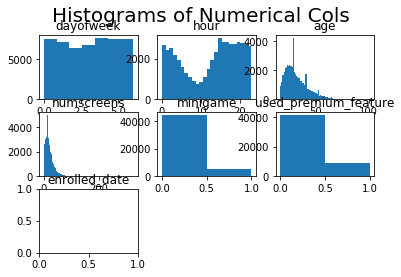

In [21]:
plt.suptitle('Histograms of Numerical Cols', fontsize=20)
for i in range(1, data2.shape[1] + 1):
    plt.subplot(3, 3, i)
    f = plt.gca()
    f.set_title(data2.columns.values[i - 1])
    
    # no. of bins
    vals = np.size(data2.iloc[:, i - 1].unique())
    
    plt.hist(data2.iloc[:, i - 1], bins=vals)

## Correlation

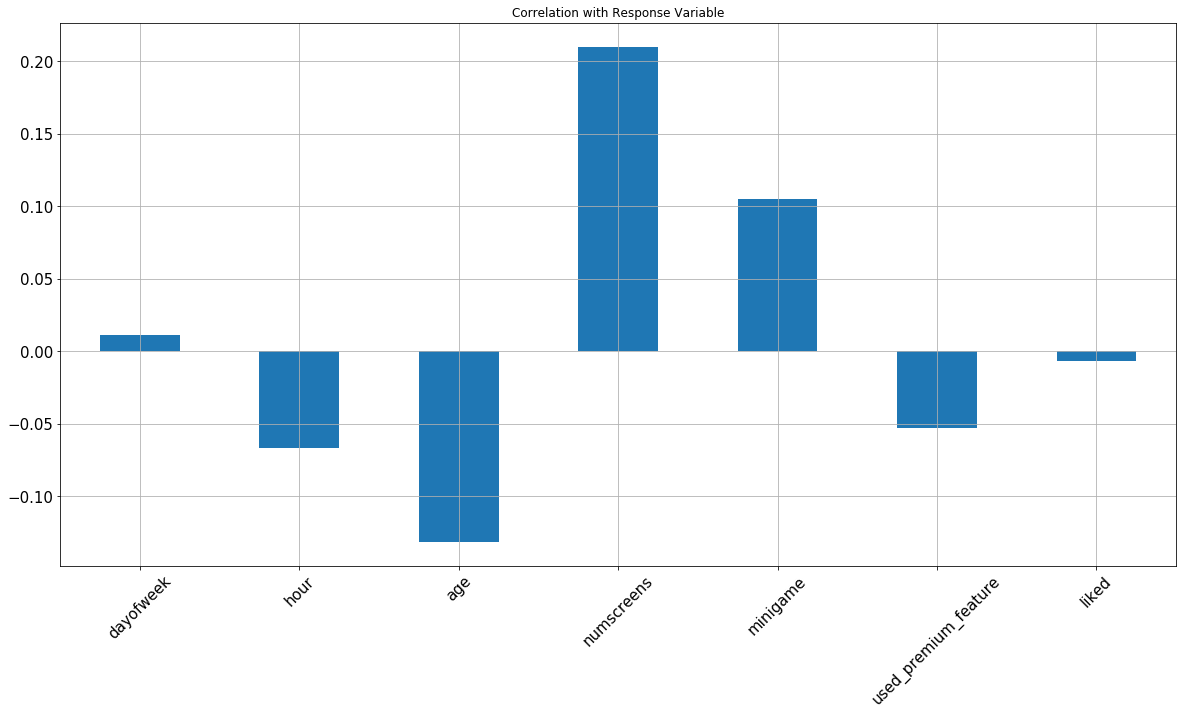

In [23]:
data2.corrwith(data['enrolled']).plot.bar(figsize = (20, 10),
                    title='Correlation with Response Variable',
                    fontsize=15, rot=45,
                    grid=True)

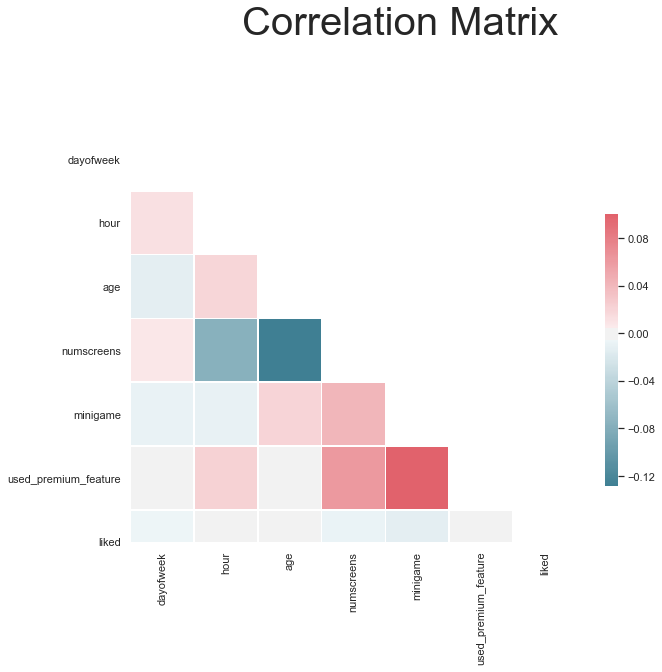

In [30]:
sns.set(style='white', font_scale=1)

#compute the correlation matrix
corr = data2.corr()

#generate a mask forthe upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

#set up matplotlib figure
f, ax = plt.subplots(figsize=(10,10))
f.suptitle("Correlation Matrix", fontsize=40)

#Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

#draw the heatmap with the mask & correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=0.1, center=0,
           square=True, linewidth=0.5, cbar_kws={'shrink': 0.5})

In [37]:
# Formatting Date Columns
data["first_open"] = [parser.parse(row_date) for row_date in data["first_open"]]
data.head()

,user,first_open,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,liked
0,235136,2012-12-27 02:14:51.273,3,2,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,NaN,0
1,333588,2012-12-02 01:16:00.905,6,1,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,NaN,0
2,254414,2013-03-19 19:19:09.157,1,19,23,"Splash,Cycle,Loan",3,0,1,0,NaN,1
3,234192,2013-07-05 16:08:46.354,4,16,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,2013-07-05 16:11:49.513,0
4,51549,2013-02-26 18:50:48.661,1,18,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,2013-02-26 18:56:37.841,1


In [39]:
data["enrolled_date"] = [parser.parse(row_date)\
                     if isinstance(row_date, str)\
                     else row_date\
                         for row_date in data["enrolled_date"]]
data.head(1)

,user,first_open,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,liked
0,235136,2012-12-27 02:14:51.273,3,2,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,NaT,0


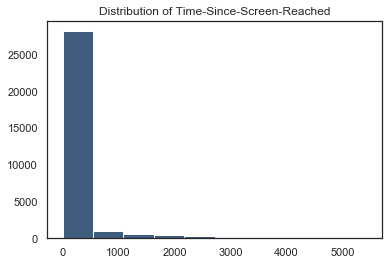

In [40]:
# Selecting Time For Response
data["difference"] = (data['enrolled_date'] - data['first_open']).astype('timedelta64[h]')
response_hist = plt.hist(data["difference"].dropna(), color='#3F5D7D')

plt.title('Distribution of Time-Since-Screen-Reached')
plt.show()

# majority of enrollements are under the 1000 hours. 
# But is it under the first 1000 hours or much lesser?

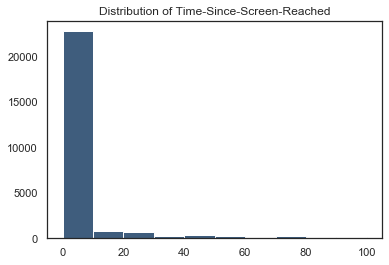

In [42]:
plt.hist(data["difference"].dropna(), color='#3F5D7D', range = [0, 100])
plt.title('Distribution of Time-Since-Screen-Reached')
plt.show()

# therefore, most of the enrollements are under 10 hours.

In [43]:
data.loc[data.difference > 48, 'enrolled'] = 0
data = data.drop(columns=['enrolled_date', 'difference', 'first_open'])

## feature engineering

In [49]:
top_screens = pd.read_csv('0.data/top_screens.csv').top_screens.values
top_screens

array(['Loan2', 'location', 'Institutions', 'Credit3Container',
       'VerifyPhone', 'BankVerification', 'VerifyDateOfBirth',
       'ProfilePage', 'VerifyCountry', 'Cycle', 'idscreen',
       'Credit3Dashboard', 'Loan3', 'CC1Category', 'Splash', 'Loan',
       'CC1', 'RewardsContainer', 'Credit3', 'Credit1', 'EditProfile',
       'Credit2', 'Finances', 'CC3', 'Saving9', 'Saving1', 'Alerts',
       'Saving8', 'Saving10', 'Leaderboard', 'Saving4', 'VerifyMobile',
       'VerifyHousing', 'RewardDetail', 'VerifyHousingAmount',
       'ProfileMaritalStatus', 'ProfileChildren ', 'ProfileEducation',
       'Saving7', 'ProfileEducationMajor', 'Rewards', 'AccountView',
       'VerifyAnnualIncome', 'VerifyIncomeType', 'Saving2', 'Saving6',
       'Saving2Amount', 'Saving5', 'ProfileJobTitle', 'Login',
       'ProfileEmploymentLength', 'WebView', 'SecurityModal', 'Loan4',
       'ResendToken', 'TransactionList', 'NetworkFailure', 'ListPicker'],
      dtype=object)

In [50]:
data['screen_list'] = data['screen_list'].astype(str) + ','
for sc in top_screens:
    data[sc] = data['screen_list'].str.contains(sc).astype(int)
    data['screen_list'] = data['screen_list'].str.replace(sc+",", "")
    
data.head()

,user,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,liked,...,ProfileJobTitle,Login,ProfileEmploymentLength,WebView,SecurityModal,Loan4,ResendToken,TransactionList,NetworkFailure,ListPicker
0,235136,3,2,23,"joinscreen,product_review,ScanPreview,VerifyTo...",15,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,333588,6,1,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,254414,1,19,23,,3,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
3,234192,4,16,28,"product_review,Home,product_review,ReferralCon...",40,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,51549,1,18,31,"joinscreen,ScanPreview,VerifySSN,Home,SelectIn...",32,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0


In [51]:
# to indicate the number of leftover screens, which are not there in the top_screens.csv
data['Other'] = data['screen_list'].str.count(",")
data = data.drop(columns=['screen_list'])
data.head()

,user,dayofweek,hour,age,numscreens,minigame,used_premium_feature,enrolled,liked,Loan2,...,Login,ProfileEmploymentLength,WebView,SecurityModal,Loan4,ResendToken,TransactionList,NetworkFailure,ListPicker,Other
0,235136,3,2,23,15,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,7
1,333588,6,1,24,13,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5
2,254414,1,19,23,3,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,234192,4,16,28,40,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,6
4,51549,1,18,31,32,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,10


## Funnels

in-order to get rid of the similarly correlated screens,
group them into funnels

In [54]:
savings_screens = ["Saving1",
                    "Saving2",
                    "Saving2Amount",
                    "Saving4",
                    "Saving5",
                    "Saving6",
                    "Saving7",
                    "Saving8",
                    "Saving9",
                    "Saving10"]
data["SavingCount"] = data[savings_screens].sum(axis=1)
data = data.drop(columns=savings_screens)

KeyError: "None of [Index(['Saving1', 'Saving2', 'Saving2Amount', 'Saving4', 'Saving5', 'Saving6',\n       'Saving7', 'Saving8', 'Saving9', 'Saving10'],\n      dtype='object')] are in the [columns]"

In [56]:
cm_screens = ["Credit1",
               "Credit2",
               "Credit3",
               "Credit3Container",
               "Credit3Dashboard"]
data["CMCount"] = data[cm_screens].sum(axis=1)
data = data.drop(columns=cm_screens)

In [57]:
cc_screens = ["CC1",
            "CC1Category",
            "CC3"]
data["CCCount"] = data[cc_screens].sum(axis=1)
data = data.drop(columns=cc_screens)

In [58]:
loan_screens = ["Loan",
               "Loan2",
               "Loan3",
               "Loan4"]
data["LoansCount"] = data[loan_screens].sum(axis=1)
data = data.drop(columns=loan_screens)

In [59]:
data.head()

,user,dayofweek,hour,age,numscreens,minigame,used_premium_feature,enrolled,liked,location,...,SecurityModal,ResendToken,TransactionList,NetworkFailure,ListPicker,Other,SavingCount,CMCount,CCCount,LoansCount
0,235136,3,2,23,15,0,0,0,0,0,...,0,0,0,0,0,7,0,0,0,1
1,333588,6,1,24,13,0,0,0,0,1,...,0,0,0,0,0,5,0,0,0,1
2,254414,1,19,23,3,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,1
3,234192,4,16,28,40,0,0,1,0,1,...,0,0,0,0,0,6,0,3,0,1
4,51549,1,18,31,32,0,0,1,1,0,...,0,0,0,0,0,10,0,2,0,1


In [64]:
#### Saving Results ####
data.to_csv('0.data/new_appdata10.csv', index = False)